# Student Performance

Jade Chen 22411268

![Student Performance](https://github.com/jadeeechen/STAT-301-Project-2023W1-/blob/main/studentperformance.jpg?raw=true)
Source: Youtube - Ma. Israelle S. Lopez

## PART I - DATA AND QUESTIONS

### Description

The data includes two datasets about student performance. The data is taken from two Portuguese secondary schools and collected through school reports and questionnaires. One dataset is about “Mathematics” and the other is about “Portuguese Language”.

For our project, we are only using the dataset on “Mathematics”.

### Source

The original dataset was taken from the following link:
https://archive.ics.uci.edu/dataset/320/student+performance

The dataset is read in from the following link (personal GitHub):
https://raw.githubusercontent.com/jadeeechen/STAT-301-Project-2023W1-/main/student-mat.csv

### Research Question
<span style="color:red"> Can family background, number of failures, and number of absences predict a student's final grade in Mathematics?</span>

1. Response Variable (Dependent Variable)
    - `G3` (Final Grade)<br><br>

2. Explanatory Variables (Independent Variables)
    - Family Background: `Internet` (Internet Access at Home)
        * Note: There are multiple variables that can be used for family background, here, it has been narrowed down to one variable.
    - `Absences` (Number of School Absences)
    - `Failures` (Number of Past Class Failures)

### Importing Packages

In [1]:
library(tidyverse)
library(GGally)
library(patchwork)
library(corrplot)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.92 loaded


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Read Data
Read in data from the web, split by delimiter `;` to have one feature per column, and show the first 3 observations.

In [2]:
url = 'https://raw.githubusercontent.com/jadeeechen/STAT-301-Project-2023W1-/main/student-mat.csv'
data <- read_csv(url) |>
    separate_wider_delim(cols = 'school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3',
                         delim = ";",
                         names = c('School', 'Sex', 'Age', 'Address', 'FamilySize', 'PStatus', 'MEdu', 'FEdu', 'MJob', 'FJob', 'Reason', 'Guardian', 'TravelTime', 'StudyTime', 'Failures', 'SchoolSupport', 'FamSupport', 'Paid', 'Activities', 'Nursery', 'Higher', 'Internet', 'Romantic', 'FamRel', 'FreeTime', 'GoOut', 'DAlch', 'WAlch', 'Health', 'Absences', 'G1', 'G2', 'G3')
                        )
head(data, 3)

Rows: 395 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;g...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


School,Sex,Age,Address,FamilySize,PStatus,MEdu,FEdu,MJob,FJob,⋯,FamRel,FreeTime,GoOut,DAlch,WAlch,Health,Absences,G1,G2,G3
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10


### Drop Features

Since we are only interested in the final grade `G3`, we shall drop the first and second period grades `G1` and `G2`. As seen below, only `G3` remains in `data`.

As noted in the dataset source:
> Important Note: The target attribute `G3` has a strong correlation with attributes `G2` and `G1`. This occurs because `G3` is the final year grade (issued at the 3rd period), while `G1` and `G2` correspond to the 1st and 2nd period grades. It is more difficult to predict `G3` without `G1` and `G2`, but such prediction is much more useful (see paper source for more details).

In [3]:
data <- data |>
    select(-G1, -G2)
head(data, 3)

School,Sex,Age,Address,FamilySize,PStatus,MEdu,FEdu,MJob,FJob,⋯,Internet,Romantic,FamRel,FreeTime,GoOut,DAlch,WAlch,Health,Absences,G3
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,no,no,4,3,4,1,1,3,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,yes,no,5,3,3,1,1,3,4,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,yes,no,4,3,2,2,3,3,10,10


### Number of Observations
With the `unique()` function, possible duplicate values present in data frame were eliminated. We can see that there are 395 unique observations. 

In [4]:
nrow(unique(data))

[1] 395

### Data Wrangling
Most of the data do not have the correct type. The relevant features were converted to numeric/factor type according to the "Additional Variable Information" from the dataset source.

In [5]:
#Binary -> Factor Type
data$School <- as.factor(data$School)
data$Sex <- as.factor(data$Sex)
data$Address <- as.factor(data$Address)
data$FamilySize <- as.factor(data$FamilySize)
data$PStatus <- as.factor(data$PStatus)
data$SchoolSupport <- as.factor(data$SchoolSupport)
data$FamSupport <- as.factor(data$FamSupport)
data$Paid <- as.factor(data$Paid)
data$Activities <- as.factor(data$Activities)
data$Nursery <- as.factor(data$Nursery)
data$Higher <- as.factor(data$Higher)
data$Internet <- as.factor(data$Internet)
data$Romantic <- as.factor(data$Romantic)

#Nominal -> Factor Type
data$MJob <- as.factor(data$MJob)
data$FJob <- as.factor(data$FJob)
data$Reason <- as.factor(data$Reason)
data$Guardian <- as.factor(data$Guardian)

#Numeric -> Numeric Type
data$Age <- as.numeric(data$Age)
data$MEdu <- as.numeric(data$MEdu)
data$FEdu <- as.numeric(data$FEdu)
data$TravelTime <- as.numeric(data$TravelTime)
data$StudyTime <- as.numeric(data$StudyTime)
data$Failures <- as.numeric(data$Failures)
data$FamRel <- as.numeric(data$FamRel)
data$FreeTime <- as.numeric(data$FreeTime)
data$GoOut <- as.numeric(data$GoOut)
data$DAlch <- as.numeric(data$DAlch)
data$WAlch <- as.numeric(data$WAlch)
data$Health <- as.numeric(data$Health)
data$Absences <- as.numeric(data$Absences)
data$G3 <- as.numeric(data$G3)

### Tidy Format

We can see from the table below that our dataframe is now in a tidy format.

In [6]:
head(data, 3)

School,Sex,Age,Address,FamilySize,PStatus,MEdu,FEdu,MJob,FJob,⋯,Internet,Romantic,FamRel,FreeTime,GoOut,DAlch,WAlch,Health,Absences,G3
<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,no,no,4,3,4,1,1,3,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,yes,no,5,3,3,1,1,3,4,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,yes,no,4,3,2,2,3,3,10,10


1. **Each variable forms a column**: Each column represents a specific variable.
    - For example, `School` `Sex` `Age`, etc.<br><br>

2. **Each observation forms a row**: Each row in represents a unique observation.
    - For example, the first row represents one student's information, the second row represents another student's information, etc.<br><br>

3. **Each value is stored in a cell**: Each value of a variable is stored in a cell of the table, and the values do not contain units.
    - For example, in the first row, the value `F` in the `Sex` column represents the gender of the student.<br><br>

3. **Everything forms into a table**: All of this information is organized within a single table, making it a comprehensive and structured dataset.

### Feature Information
In total, there are 33 features. The following dataframe shows the name, the number of unique values, and the type of each feature.

In [7]:
num_unique <- lapply(data, function(x) length(unique(x)))
column_types <- lapply(data, function(x) class(x))

result_df <- data.frame(
    NumUnique = unlist(num_unique),
    DataType = unlist(column_types)
)
result_df

,NumUnique,DataType
,<int>,<chr>
School,2,factor
Sex,2,factor
Age,8,numeric
Address,2,factor
FamilySize,2,factor
PStatus,2,factor
MEdu,5,numeric
FEdu,5,numeric
MJob,5,factor


### Unique Values of Factor Features
Furthermore, we can see the possible unique values of each factor feature.

In [8]:
data_factor <- select_if(data, is.factor)
ulst <- lapply(data_factor, function(x) unique(as.character(x)))
ulst

$School
[1] "GP" "MS"

$Sex
[1] "F" "M"

$Address
[1] "U" "R"

$FamilySize
[1] "GT3" "LE3"

$PStatus
[1] "A" "T"

$MJob
[1] "at_home"  "health"   "other"    "services" "teacher" 

$FJob
[1] "teacher"  "other"    "services" "health"   "at_home" 

$Reason
[1] "course"     "other"      "home"       "reputation"

$Guardian
[1] "mother" "father" "other" 

$SchoolSupport
[1] "yes" "no" 

$FamSupport
[1] "no"  "yes"

$Paid
[1] "no"  "yes"

$Activities
[1] "no"  "yes"

$Nursery
[1] "yes" "no" 

$Higher
[1] "yes" "no" 

$Internet
[1] "no"  "yes"

$Romantic
[1] "no"  "yes"

### Range of Numeric Features
For numeric features, we can further see the range of each feature.

In [9]:
# Subset numeric columns
data_numeric <- select_if(data, is.numeric)
data.frame(Min = sapply(data_numeric,min),
           Max = sapply(data_numeric,max))

,Min,Max
,<dbl>,<dbl>
Age,15,22
MEdu,0,4
FEdu,0,4
TravelTime,1,4
StudyTime,1,4
Failures,0,3
FamRel,1,5
FreeTime,1,5
GoOut,1,5


### Feature Details
Finally, we have the detailed description for possible values of each 33 features.

1. `School`: Student's School
    - GP - Gabriel Pereira
    - MS - Mousinho da Silveira
2. `Sex`: Student's Sex
    - F - female
    - M - male
3. `Age`: Student's Age
    - from 15 to 22
4. `Address`: Student's Home Address Type
    - U - urban
    - R - rural
5. `FamilySize`: Family Size
    - LE3 - less or equal to 3
    - GT3 - greater than 3
6. `Pstatus`: Parent's Cohabitation Status
    - T - living together
    - A - apart
7. `MEdu`: Mother's Education
    - 0 - none
    - 1 - primary education (4th grade)
    - 2 – 5th to 9th grade
    - 3 – secondary education
    - 4 – higher education
8. `FEdu`: Father's Education
    - 0 - none
    - 1 - primary education (4th grade)
    - 2 – 5th to 9th grade
    - 3 – secondary education
    - 4 – higher education
9. `MJob`: Mother's Job
    - teacher
    - health - health care related
    - services - civil services (e.g. administrative or police)
    - at_home
    - other
10. `FJob`: Father's Job
    - teacher
    - health - health care related
    - services - civil services (e.g. administrative or police)
    - at_home
    - other
11. `Reason`: Reason to Choose This School
    - home - close to home
    - reputation - school reputation
    - course - course preference
    - other
12. `Guardian`: Student's Guardian
    - mother
    - father
    - other
13. `TravelTime`: Home to School Travel Time
    - 1 - <15 min.
    - 2 - 15 to 30 min.
    - 3 - 30 min. to 1 hour
    - 4 - >1 hour
14. `StudyTime`: Weekly Study Time
    - 1 - <2 hours
    - 2 - 2 to 5 hours
    - 3 - 5 to 10 hours
    - 4 - >10 hours
15. `Failures`: Number of Past Class Failures
    - n if: 1 <= n < 3
    - else: 4
16. `SchoolSup`: Extra Educational Support
    - yes
    - no
17. `FamSup`: Family Educational Support
    - yes
    - no
18. `Paid`: Extra Paid Classes within the Course Subject
    - yes
    - no
19. `Activities`: Extra-Curricular Activities
    - yes
    - no
20. `Nursery`: Attended Nursery School
    - yes
    - no
21. `Higher`: Wants to Take Higher Education
    - yes
    - no
22. `Internet`: Internet Access at Home
    - yes
    - no
23. `Romantic`: With a Romantic Relationship
    - yes
    - no
24. `FamRel`: Quality of Family Relationships
    - 1 (very bad) to 5 (excellent)
25. `FreeTime`: Free Time After School
    - 1 (very low) to 5 (very high)
26. `GoOut`: Going Out with Friends
    - 1 (very low) to 5 (very high)
27. `DAlch`: Workday Alchohol Consumption
    - 1 (very low) to 5 (very high)
28. `WAlch`: Weekend Alchohol Consumption
    - 1 (very low) to 5 (very high)
29. `Health`: Current Health Status
    - 1 (very bad) to 5 (very good)
30. `Absences`: Number of School Absences
    - 0 to 93
31. `G1`: First Period Grade
    - 0 to 20
32. `G2` Second Period Grade
    - 0 to 20
33. `G3` Final Grade
    - 0 to 20

## PART II -  Exploratory Data Analysis and Visualization

###  Exploratory Data Analysis

We will first conduct some EDA, then we will create a final visualization suitable to answer our research question.

#### Summary Statistics
We observe the data's central tendencies, spread, and shape to understand the data's overall structure.

In [10]:
summary(data)

 School   Sex          Age       Address FamilySize PStatus      MEdu      
 GP:349   F:208   Min.   :15.0   R: 88   GT3:281    A: 41   Min.   :0.000  
 MS: 46   M:187   1st Qu.:16.0   U:307   LE3:114    T:354   1st Qu.:2.000  
                  Median :17.0                              Median :3.000  
                  Mean   :16.7                              Mean   :2.749  
                  3rd Qu.:18.0                              3rd Qu.:4.000  
                  Max.   :22.0                              Max.   :4.000  
      FEdu             MJob           FJob            Reason      Guardian  
 Min.   :0.000   at_home : 59   at_home : 20   course    :145   father: 90  
 1st Qu.:2.000   health  : 34   health  : 18   home      :109   mother:273  
 Median :2.000   other   :141   other   :217   other     : 36   other : 32  
 Mean   :2.522   services:103   services:111   reputation:105               
 3rd Qu.:3.000   teacher : 58   teacher : 29                                
 Max. 

**Interpretation**

1. **`School` Distribution**: The dataset primarily contains students from the `GP` (Gabriel Pereira) school, with only a smaller representation from the `MS` (Mousinho da Silveira) school.

2. **`Gender` Distribution**: There are more female students (`F`) in the dataset than male students (`M`).

3. **`Age` Range**: The age of students in the dataset ranges from 15 to 22, with a median age of 17 years.

4. **`Address` Distribution**: Most students live in urban areas (`U`), while a smaller percentage lives in rural areas (`R`).

5. **`Family Size`**: The majority of students come from families with more than three members (`GT3`). A smaller portion comes from families with three or fewer members (`LE3`).

6. **`Parental Status (PStatus)`**: Most students have parents who live together (`T`), while a smaller group has parents who live apart (`A`).

7. **`Parental Education`**: Parental education levels (`MEdu` and `FEdu`) vary, with the majority falling in the middle range (2-3 on a scale of 0-4).

8. **`Travel Time`**: The travel time to school (`TravelTime`) is generally short, with a range from 1 to 4.

9. **`Study Time`**: Study time (`StudyTime`) ranges from 1 to 4, with a relatively balanced distribution.

10. **`Failure History`**: Most students have a history of few or no past class failures (`Failures` range from 0 to 3).

11. **`Family Support`**: There is a balanced distribution of students with or without family support (`FamSupport`).

12. **`Paid Classes`**: A portion of students receives extra paid classes within the course (`Paid`: `yes`).

13. **`Extracurricular Activities`**: A portion of students participates in extracurricular activities (`Activities`: `yes`).

14. **`Nursery Attendance`**: Most students attended nursery school (`Nursery`: `yes`).

15. **`Desire for Higher Education`**: The majority of students express a desire to pursue higher education (`Higher`: `yes`).

16. **`Internet Access`**: A significant portion of students has internet access at home (`Internet`: `yes`).

17. **`Romantic Relationships`**: A subset of students is in romantic relationships (`Romantic`: `yes`).

18. **`Family Relationships (FamRel)`**: Family relationships are generally rated positively, with a median score of 4 on a scale of 1 to 5.

19. **`Free Time (FreeTime)`**: Students generally have moderate amounts of free time.

20. **`Socializing (GoOut)`**: Students have a range of socializing levels.

21. **`Alcohol Consumption (DAlch and WAlch)`**: Alcohol consumption varies but is generally moderate.

22. **`Health Status (Health)`**: Most students report moderate to good health status.

23. **`Absences`**: Absences range from 0 to 75, with a mean of approximately 5.7.

24. **`Final Grades (G3)`**: The final grades (`G3`) vary from 0 to 20, with a mean of approximately 10.4.

#### Box Plots

We use a box plot to examine the relationship between internet access `Internet` and final grade `G3`, according to the research question.

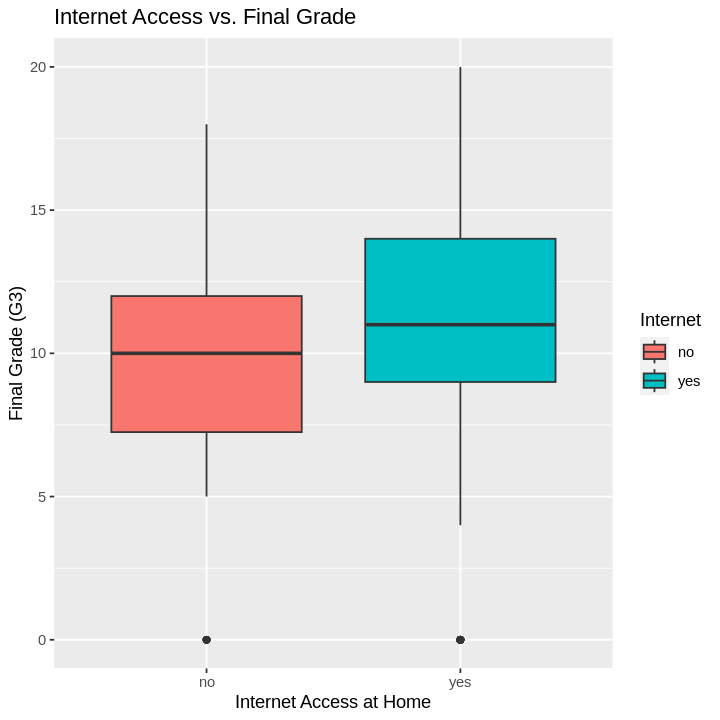

In [11]:
options(repr.plot.width=6, repr.plot.height=6)
box_internet <- ggplot(data, aes(x = Internet, y = G3, fill = Internet)) +
    geom_boxplot() +
    labs(x = "Internet Access at Home", y = "Final Grade (G3)") +
    ggtitle("Internet Access vs. Final Grade")
box_internet

**Interpretation**

1. **Central Tendency:**: All three quartiles (lower, middle, upper) are slightly higher for the group with internet access compared to the group without internet access. This indicates that, on average, students with internet access have higher final grades across the board.
2. **Spread of Data:**: The lower whisker for the group with internet access is longer, this indicates that there is a wider range of lower final grades in the group with internet access compared to the group without internet access. The upper whiskers are the same for both groups, this suggests that the upper range of final grades is similar for students with and without internet access. The highest final grades achieved by students in both groups are comparable.
3. **Outliers:**: Both groups have a dot for outliers at the same location (`0`) of the final grade, indicating that there are data points in both groups with exceptionally low final grades. This suggests that certain students from both groups face similar academic challenges, or perhaps they missed school due to extenuating circumstances.

In summary, the box plot reveals that students with internet access, on average, perform better in terms of final grades, but there is more variation in lower grades within this group. It also highlights that both groups share similar academic challenges, as indicated by the presence of outliers with exceptionally low final grades.

#### Faceted Bar Chart

Next, we shall use faceted bar charts to examine the distribution of our numeric response variable `G3` (using the average), and how it varies across **factor** and **numeric** variables in order to identify trends, patterns, and differences in the data.

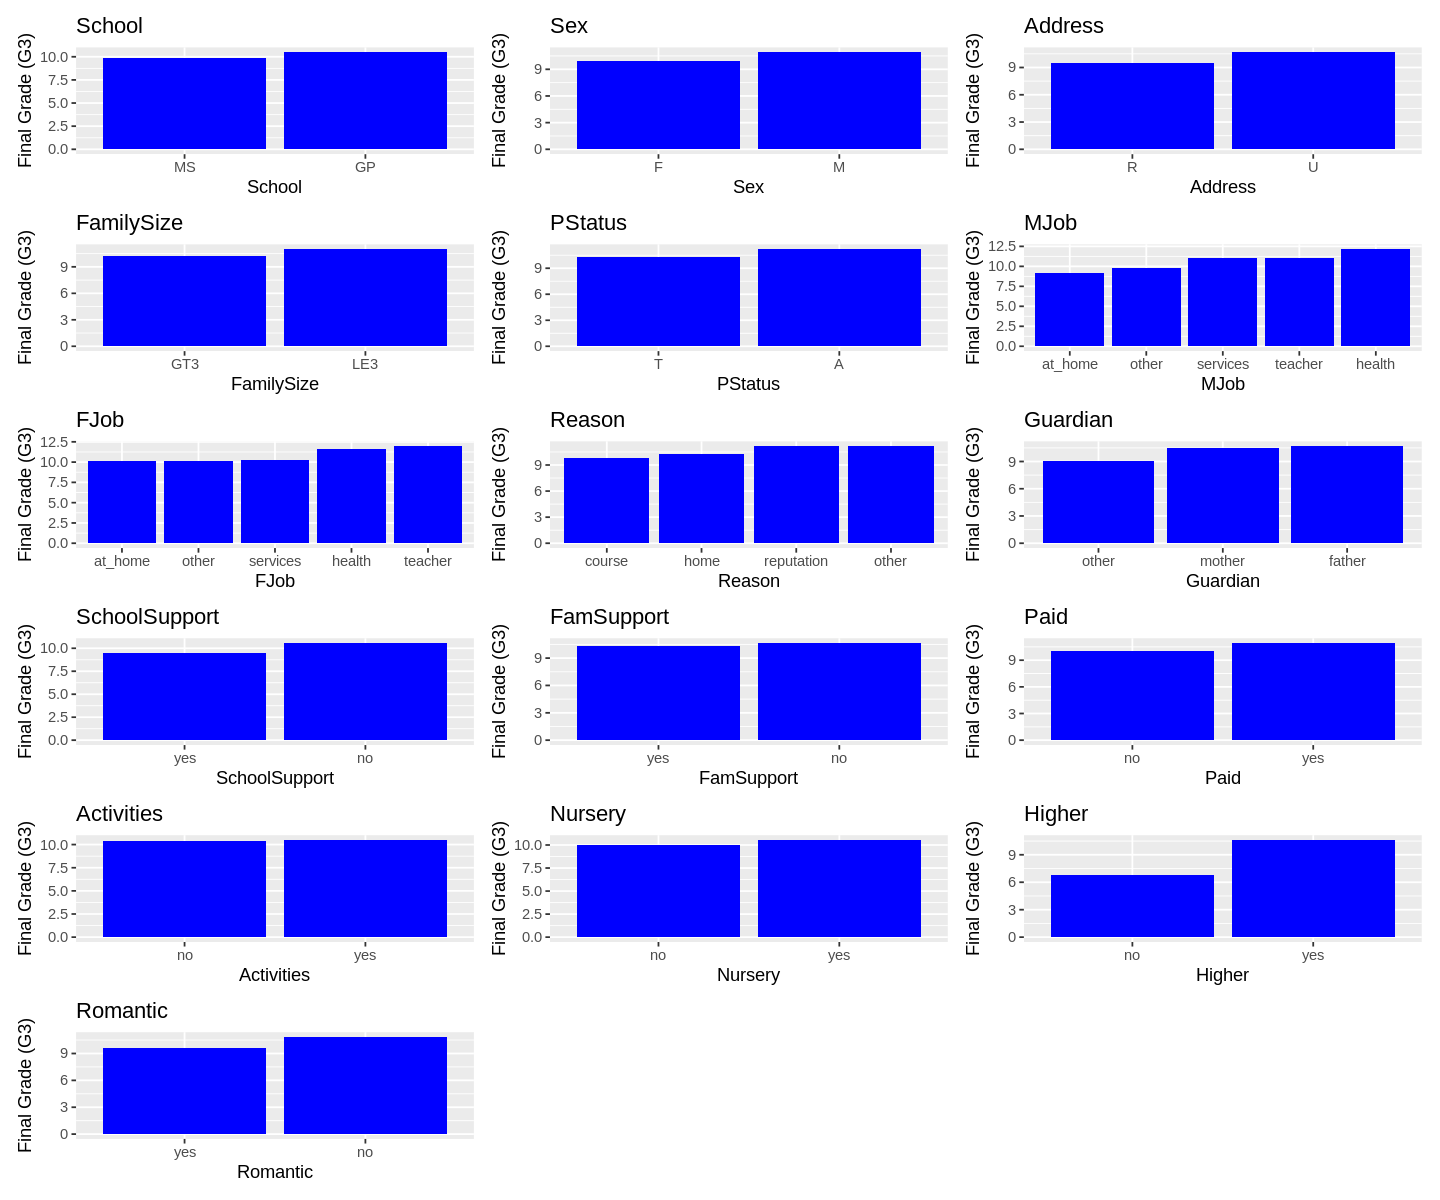

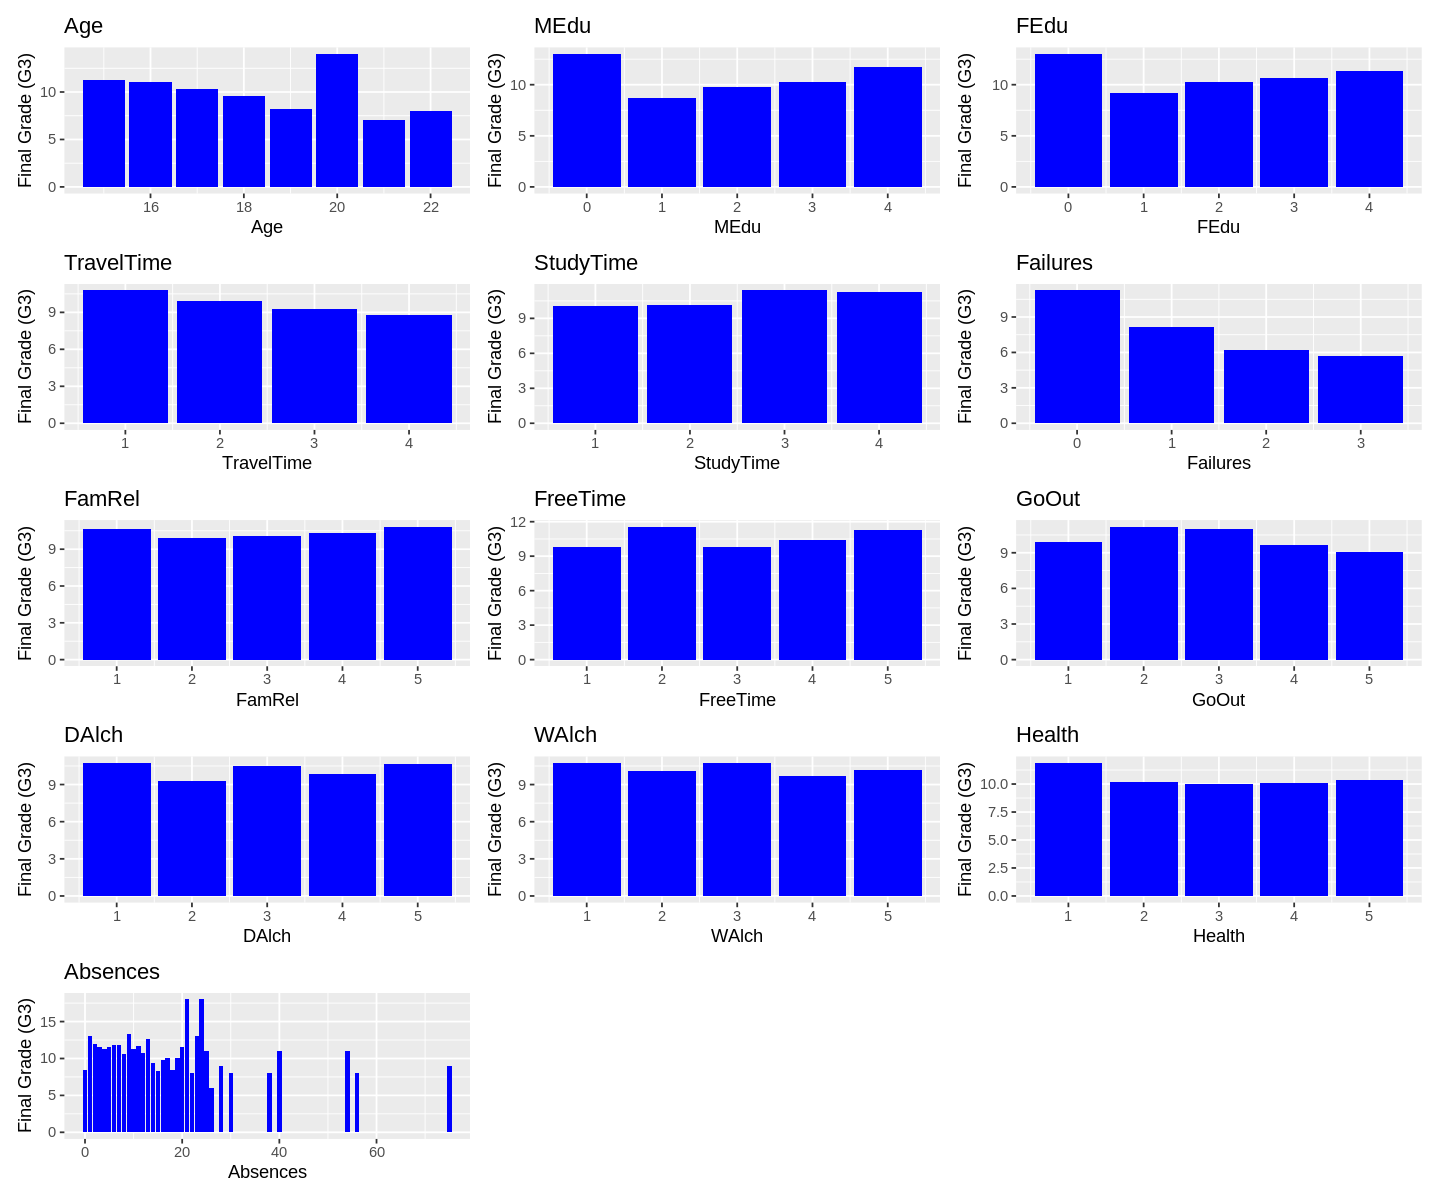

In [12]:
options(repr.plot.width=12, repr.plot.height=10)

############## FACTOR ############## 

#Remove Internet because already explored
data_factor_remaining <- data_factor |>
    select(-Internet)

# Define the variable names for faceting
facet_vars_factor <- colnames(data_factor_remaining)

# Create a list of ggplot objects for each facet
facetbar_factor <- lapply(facet_vars_factor, function(var) {
    average_data <- data |>
        group_by(.data[[var]]) |>
        summarize(avg_G3 = mean(G3, na.rm = TRUE)) |>
        arrange(desc(avg_G3)) |>
        mutate(!!var := reorder(.data[[var]], avg_G3)) #  Re-arrange the factor levels so that they are ordered by the values of avg_G3
    
    ggplot(average_data, aes(x = .data[[var]], y = avg_G3)) +
    geom_bar(stat = "identity", fill = "blue") +
    labs(x = var, y = "Final Grade (G3)") +
    ggtitle(var)
})

plot_facetbar_factor <- wrap_plots(facetbar_factor, ncol = 3)

############## NUMERIC ############## 

options(repr.plot.width=12, repr.plot.height=10)

data_numeric_dropG3 <- data_numeric |>
    select(-G3)

# Define the variable names for faceting
facet_vars_numeric <- colnames(data_numeric_dropG3)

# Create a list of ggplot objects for each facet
facetbar_numeric <- lapply(facet_vars_numeric, function(var) {
    average_data <- data |>
        group_by(.data[[var]]) |>
        summarize(avg_G3 = mean(G3, na.rm = TRUE))
    
    ggplot(average_data, aes(x = .data[[var]], y = avg_G3)) +
    geom_bar(stat = "identity", fill = "blue") +
    labs(x = var, y = "Final Grade (G3)") +
    ggtitle(var)
})

# Combine the plots
plot_facetbar_numeric <- wrap_plots(facetbar_numeric, ncol = 3)

plot_facetbar_factor
plot_facetbar_numeric

**Interpretation**

*On average*,

**Categorical**

1. `School`: Those from the school Gabriel Pereira `GP` have a higher final grade.
2. `Sex`: Males `M` have a higher final grade.
3. `Address`: Those who live in urban parts `U`, have a higher final grade.
4. `FamilySize`: Those from family sizes less than 3 `LE3` have a higher final grade.
5. `PStatus`: Those with parents that live apart `A` have a higher final grade.
6. `MJob`: Those with fathers working in health care related jobs `health` have a higher final grade.
7. `FJob`: Those with mothers working in education `teacher` have a higher final grade.
8. `Reason`: Those that chose their school due to school reputation `reputation` and other reasons `other` have a higher final grade (comparable).
9. `Guardian`: Those whose guardian are their fathers `father` or mothers `mother` have a higher final grade than those with other types `other`.
10. `SchoolSupport`: Those without extra educational support `no` have a higher final grade.
11. `FamSupport`: Those without family educational support `no` have a higher final grade.
12. `Paid`: Those with extra paid classes within the course subject `yes` have a higher final grade.
13. `Activities`: Those who do `yes` an do not engage `no` in extra-curricular activities have no observable difference in final grades.
14. `Nursery`: Those that attended nursery school `yes` have a slightly higher final grade.
15. `Higher`: Those that want to take higher education `yes` have an observably higher final grade.
16. `Romantic`: Those with a romantic relationship `yes` have a lower final grade.

**Numerical**

1. `Age`: Those of age `20` have the highest final grade.
2. `MEdu`: Those whose mother's don't have higher education have the highest grade. However, as the mother's education increases, the students final grade increases.
3. `FEdu`: Same with father's education
4. `TravelTime`: As the home to school travel time increases, the final grade decreases.
5. `StudyTime`: As study time increases, final grade increases. However, once the study time is more than 10 hours, there is no observable increase.
6. `Failures`: As number of past class failures increase, the final grade decreases.
7. `FamRel`: Those with extremely high or extremely low quality of family relationships tend to have higher final grades.
8. `FreeTime`: There is no observable trend in regards to free time after school.
9. `GoOut`: Those that spend an extremely high or extremely low amount of time going out with friends tend to have lower final grades.
10. `DAlch`: There is no observable trend in regards to workday alchohol consumption.
11. `WAlch`: There is no observable trend in regards to weekend alchohol consumption.
12. `Health`: Those with very bad health status tend to have a higher final grade.
13. `Absences`: Those with aroound 20 absences tend to have the highest final grades.

It's important to note that these observations are based on averages and may not necessarily imply causation. Further analysis and exploration are needed to understand the underlying reasons behind these patterns and differences in the dataset.


#### Correlation Plot

Here we are using a correlation plot to explore the relationship between the **numerical** variables.

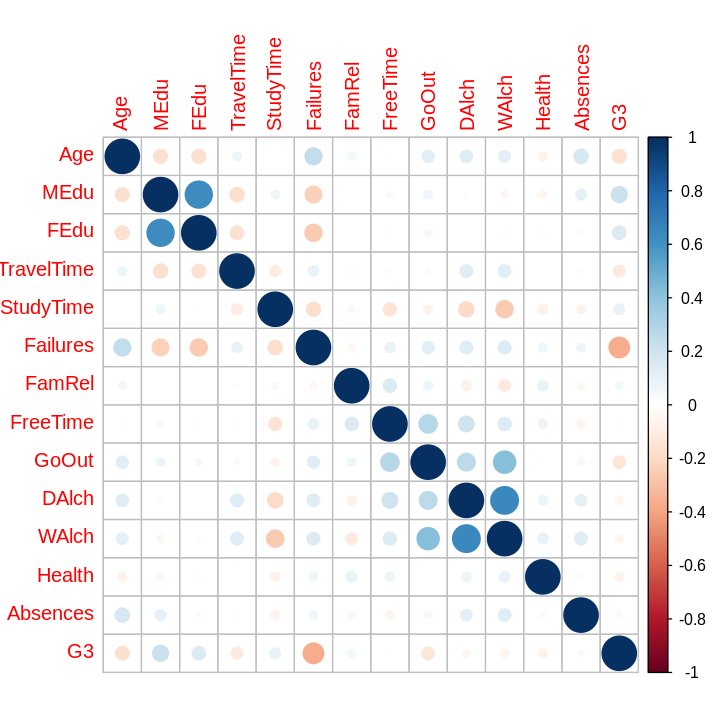

In [13]:
options(repr.plot.width=6, repr.plot.height=6)
corrplot(cor(data_numeric))

**Interpretation**

It is essential to be mindful of the presence of **multicollinearity**, particularly in the cases of `DAlch` between `WAlch`, and `MEdu` between `FEdu`. Their strong positive correlation may result in difficulties when interpreting their individual impacts in regression models later on. We should consider addressing multicollinearity through variable selection to ensure the reliability and interpretability of our analysis later on. 

### Scatter Plots

Next, we will visualize the relationship of the respones variable `G3` with each of the the numerical variables `Absences` `Failures` in two separate plots.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


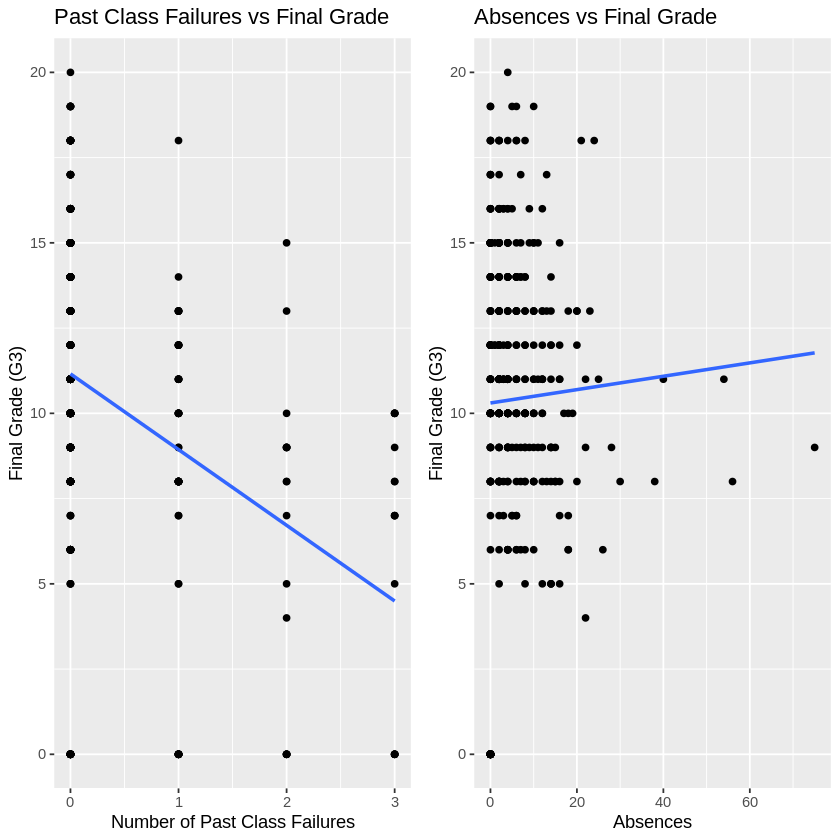

In [14]:
options(repr.plot.width=7, repr.plot.height=7)
scatter_absences <- ggplot(data, aes(x = Absences, y = G3)) +
  geom_point() +
  labs(x = "Absences", y = "Final Grade (G3)", 
       title = "Absences vs Final Grade") +
  geom_smooth(method = "lm", se = FALSE)

scatter_failures <- ggplot(data, aes(x = Failures, y = G3)) +
  geom_point() +
  labs(x = "Number of Past Class Failures", y = "Final Grade (G3)", 
       title = "Past Class Failures vs Final Grade") +
  geom_smooth(method = "lm", se = FALSE)

scatter_combined <- grid.arrange(scatter_failures, scatter_absences, ncol = 2)

**Interpretation**

1. As the number of absences increases, there is a noticeable trend of final grades decreasing, indicating a small positive correlation between these two variables. The scatter plot reveals a sloping trendline, suggesting that as students accumulate more absences, their final grades tend to be lower.
2. As the number of past class failures increases, there is a clear downward slope in the final grades, indicating a moderate negative correlation between these two variables. This suggests that higher past class failures consumption is associated with slightly lower final grades.

### Final Visualization

After we've used multiple visualizations to perform EDA, we conclude that the following visualization is most relevent to address the research question.

- Note: We do not use factor variables that have more than 3 levels. This is because using factor variables with too many levels in multiple linear regression can lead to problems such as high dimensionality, overfitting, and reduced model interpretability. These factors can make the model complex, computationally intensive, and violate key regression assumptions.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]

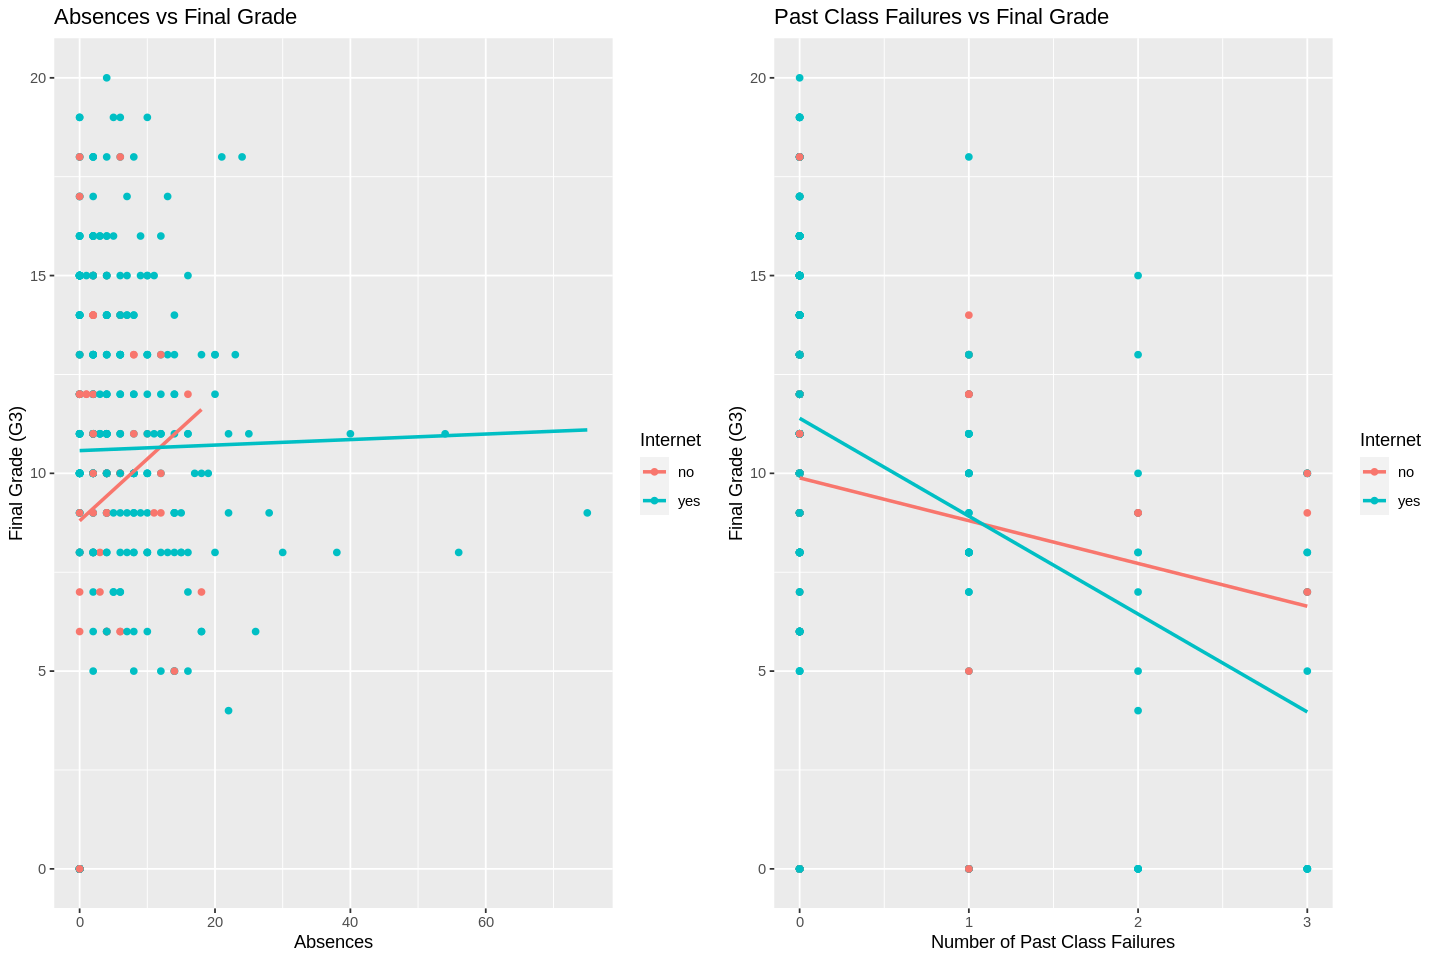

In [20]:
options(repr.plot.width=12, repr.plot.height=8)
scatter_absences_combined <- ggplot(data, aes(x = Absences, y = G3, color = Internet)) +
  geom_point() +
  labs(x = "Absences", y = "Final Grade (G3)", 
       title = "Absences vs Final Grade") +
  geom_smooth(method = "lm", se = FALSE)

scatter_failures_combined <- ggplot(data, aes(x = Failures, y = G3, color = Internet)) +
  geom_point() +
  labs(x = "Number of Past Class Failures", y = "Final Grade (G3)", 
       title = "Past Class Failures vs Final Grade") +
  geom_smooth(method = "lm", se = FALSE)

combined_plot <- grid.arrange(scatter_absences_combined, scatter_failures_combined, ncol = 2)

combined_plot

#### Reason for Plot Choice

1. **Comparative Analysis**: We can assess how two factors `Failures` `Absences` individually relate to the final grade `G3` and whether one appears to have a more pronounced effect than the other.

2. **Interaction Assessment**: We can examine whether the influence of absences and past class failures on final grades varies depending on whether students have internet access at home `Internet`.

3. **Prediction and Inference**: The linear regression lines in each plot provide a basis for prediction and inference. We can observe the trend and slope of the lines to make predictions about final grades based on absences and past class failures while accounting for internet access at home.

In summary, this combined plot provides a powerful visual tool for investigating the research question, exploring interactions between variables, and making predictions.

#### Potential Challenges

- **Multicollinearity**: As mentioned earlier, we should be cautious about multicollinearity, which arises when dummy variables are highly correlated, potentially causing issues in the model's interpretability and leading to unstable coefficient estimates.

- **Imbalanced Groups**: From the interpretations we derived from the previous summary statistics, some the distribution is not balanced across groups (e.g. `School` and `Gender`), this may to biased prediction results later on.

Further challenges may appear during the third stage: Methods and Plan.

## PART III -  Methods and Plan

### Method

As we have already conducted data reading, cleaning, wrangling, explanatory data analysis and visualizations, we will now conduct the following plan to address our question of interest.

1. **Feature Engineering:** Conduct feature engineering by merging categorical featurs with 3+ levels so they become binary factors.
    - Example: `MEdu`: Mother's Education
        - Original Encoding:
            - 0 - none
            - 1 - primary education (4th grade)
            - 2 – 5th to 9th grade
            - 3 – secondary education
            - 4 – higher education
        - Merged Encoding (Binary):
            - 0 - lower educatuon (Original: 0,1,2, 3)
            - 1 - higher education (Original: 4)."<br><br>

2. **Multicollinearity Management:** Evaluate and address multicollinearity using variance inflation factors (VIF), and remove or combine variables with high VIF values to enhance the stability and interpretability of the model.
   
2. **Dummy Variables:** Create dummy variables for the different levels of our categorical variables.
   
5. **Variable Selection:** Use Lasso regression for variable selection.

5. **Model Building:** Utilize multiple linear regression `lm` as the primary modeling technique.

6. **Evaluation:** Evaluate the model's performance using relevant metrics (e.g., R-squared, Mean Squared Error).

8. **Results:** Interpret the results in the context of the research question.

9. **Iterative Refinement:** If necessary, iterate on the model by incorporating feedback, additional data, or refining the research question.

### Reason for Method

1. **Overfitting:**
   - With a large number of factor variables and numeric variables with limited ranges, there is a risk of overfitting the model to the training data, leading to poor generalization to new data.
   - **Solution:** Regularization techniques such as Ridge or Lasso can help mitigate overfitting by penalizing large coefficients.<br><br>
   
2. **Categorical Variable Encoding:**
   - Handling factor variables with more than three levels requires appropriate dummy variables (created with one-hot encoding). However, since Lasso can perform feature selection by setting some coefficients to zero. This could lead to implications for the interpretation of the model and can introduce issues related to the omitted category.
   - **Solution:** We can use domain knowledge to merge different factor levels together so they become binary. Then, after we've selected appropriate features, we return the factor to it's original levels. <br><br>
   
4. **Multicollinearity:**
    - As seen in the Explanatory Data Analysis section, there is the presence of multicollinearity between variables.
    - **Solution:** Use variance inflation factors (VIF) for feature selection.

### Assumptions for Method

To apply our linear regression model `lm`, we need to satisfy the following assumptions:

1. **Linear Relationship:** The method assumes that the relationship between the predictor variables and the response variable is linear.

2. **Independence of Observations:** The method assumes that observations are independent of each other. We use variance inflation factors (VIF) to solve the issue of multicollinearity.

3. **Homoscedasticity:** The variance of the residuals is constant across all levels of the predictor variables.

4. **Normality of Residuals:** Assumes that the residuals (the differences between the observed and predicted values) are normally distributed.

### Potential Limitations of Method

1. **Limited Range and Few Unique Values in Numeric Variables:** Numeric variables with limited ranges and few unique values may not provide sufficient variability for the model to capture meaningful patterns, potentially leading to less informative models.
    
2. **Overfitting Concerns:** The use of Lasso regression introduces a penalty on the magnitude of coefficients, effectively selecting a subset of features and potentially reducing overfitting. However, it may also lead to the exclusion of relevant predictors if the penalty is too high. If the model is overfit to the training data, there is a risk that it may not generalize well to new, unseen data. C

3. **Data Quality and Representation:** The success of the method relies on the quality and representativeness of the data. If there are outliers, influential observations, or unobserved confounding factors, the model may be adversely affected.

4. **Limited Informative Power of Numeric Variables:** Numeric variables with limited ranges and few unique values may have limited informative power. The model's ability to capture meaningful patterns may be compromised, particularly if these variables are not strongly associated with the response.

5. **Domain Knowledge Requirement:** The method relies on domain knowledge for appropriate feature engineering, merging, and interpretation of the results. In the absence of domain expertise, there is a risk of making suboptimal decisions in the modeling process.